<a href="https://colab.research.google.com/github/Distifiaoktari/klp-9-project-apm-kelas-B/blob/main/K_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mengimport library
import pandas as pd
import numpy as np

In [21]:
#memanggilan dan menampilkan dataset 
dataset = pd.read_csv("sample_data/student_clustering.csv")
dataset

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [22]:
dataset['iq'].value_counts() 

117    15
118    13
88     12
109    11
86     11
108    10
111    10
96      9
87      9
93      8
85      8
94      8
116     7
110     7
95      7
119     6
91      5
92      5
115     5
98      5
113     4
112     4
89      4
97      3
83      3
107     2
106     2
121     1
114     1
104     1
90      1
100     1
84      1
120     1
Name: iq, dtype: int64

In [23]:
x = dataset.drop(['iq'], axis = 1)
y = dataset['iq']

In [24]:
#membagi dataset menjadi data training dan testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
#mengubah skala data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
#mengaktifkan fungsi klasifikasi pada KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array([ 86, 108, 108,  88,  92,  88, 116,  85, 108, 109,  92,  85, 108,
        93, 117,  85, 118,  91,  86,  91, 118, 108, 108, 118,  85,  88,
       109, 118,  88, 108,  88, 108,  86, 108, 104, 115,  91,  83,  93,
       115])

In [27]:
#menentukan probabilitas dari prediksi
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

In [28]:
#mengukur ketepatan/keakuratan hasil prediksi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          83       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         3
          86       0.00      0.00      0.00         2
          87       0.00      0.00      0.00         2
          88       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         1
          91       0.33      1.00      0.50         1
          92       0.00      0.00      0.00         0
          93       0.50      1.00      0.67         1
          94       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          96       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         0
         106       0.00      0.00      0.00         2
         107       0.00      0.00      0.00         1
         108       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

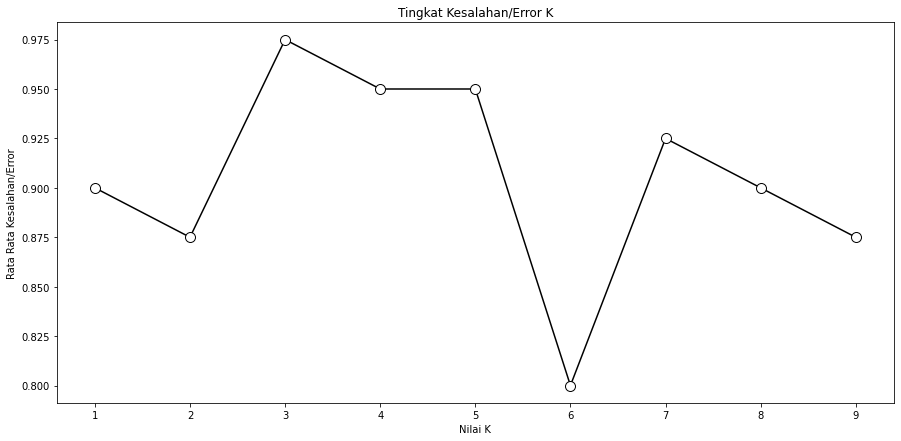

In [29]:
#visualisasi grafik/plot

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_score(y_test,y_pred) 
error = [] 
#hitung kesalahan K values dengan nilai antara 1 dan 10
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error.append(np.mean(predict_i != y_test))
#pembuatan diagram plot
y = plt.figure(figsize=(15,7))  
plt.plot(range(1, 10), error, color = 'black', linestyle = '-', marker = 'o', markerfacecolor = 'white', markersize = 10)
plt.title('Tingkat Kesalahan/Error K')  
plt.xlabel('Nilai K')  
plt.ylabel('Rata Rata Kesalahan/Error') 
plt.show()